In [2]:
# First, we are gonna get the features vector from the file
import pandas as pd
import numpy as np

df = np.array(pd.read_csv('/home/samuel/tp2/tic-tac-toe.data', sep=','))
print(df)

[['x' 'x' 'x' ... 'x' 'o' 'positive']
 ['x' 'x' 'x' ... 'o' 'x' 'positive']
 ['x' 'x' 'x' ... 'b' 'b' 'positive']
 ...
 ['o' 'x' 'o' ... 'o' 'x' 'negative']
 ['o' 'x' 'o' ... 'o' 'x' 'negative']
 ['o' 'o' 'x' ... 'x' 'x' 'negative']]


In [3]:
# We need to create a stump for each victory pattern
def stump_predictor(data, i1=0, i2=0, i3=0, symbol='b'):
    if data[i1] == symbol and data[i2] == symbol and data[i3] == symbol:
        return 1.0 if symbol == 'x' else -1.0
    return 0.0

In [8]:
def get_empirical_error(df, stumps, alpha):
    num_rows, num_cols = df.shape
    error = 0;
    for key_data, n in enumerate(df):
        final_classifier = 0
        for key_stump, stump in enumerate(stumps):
            final_classifier+=(alpha[key_stump]*stump_predictor(n, stump[0], stump[1], stump[2], stump[3]))
        result = 'positive' if final_classifier < 0 else 'negative'
        if result != n[-1]:
            error+=1

    return error / num_rows

In [4]:
# Patterns victory
stumps = [[0, 1, 2, 'x'],
          [0, 1, 2, 'o'],
          [3, 4, 5, 'x'],
          [3, 4, 5, 'o'],
          [6, 7, 8, 'x'],
          [6, 7, 8, 'o'],
          [0, 3, 6, 'x'],
          [0, 3, 6, 'o'],
          [1, 4, 7, 'x'],
          [1, 4, 7, 'o'],
          [2, 5, 8, 'x'],
          [2, 5, 8, 'o'],
          [0, 4, 8, 'x'],
          [0, 4, 8, 'o'],
          [2, 4, 6, 'x'],
          [2, 4, 6, 'o']]

In [14]:
import math

num_rows, num_cols = df.shape
w = np.full(num_rows, 1/num_rows)
alpha = np.full(len(stumps), 1.0)

loss_acc = []

for key_stump, stump in enumerate(stumps):
    error = 0
    for key_data, n in enumerate(df):
        h = stump_predictor(n, stump[0], stump[1], stump[2], stump[3])
        if (n[-1] == 'positive' and h != 1.0) or (n[-1] == 'negative' and h != -1.0):
            error+=w[key_data]

    alpha[key_stump] = (math.log10((1.0 - error)/error)) / 2

    # Update weights
    for key, wi in enumerate(w):
        y = 1.0 if df[key][-1] == 'positive' else -1.0
        h = stump_predictor(n, stump[0], stump[1], stump[2], stump[3])

        w[key] = wi * pow(math.e, (-1)*alpha[key_stump]*h*y)

    # normalize sum to 1
    w = w / sum(w)
    
    error = get_empirical_error(df, stumps, alpha)
    loss_acc.append(error)

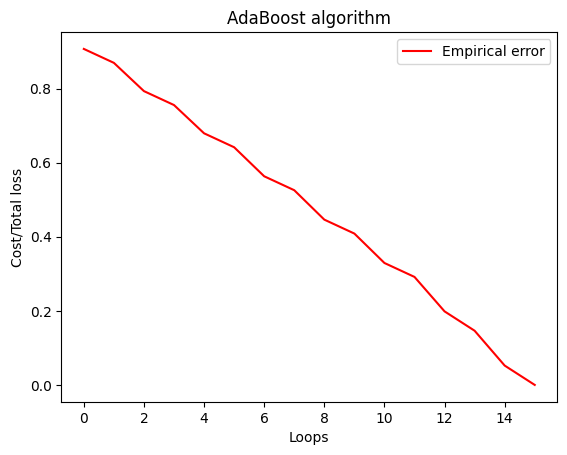

In [18]:
import matplotlib.pyplot as plt

plt.plot(loss_acc, color='r', label="Empirical error")

plt.title('AdaBoost algorithm')
plt.xlabel('Loops')
plt.ylabel('Cost/Total loss')
plt.legend(loc='upper right')
plt.show()